<a href="https://colab.research.google.com/github/Sachiii1099/Resume_Analyzer-ML_Powered/blob/main/Resume_Analyser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import re
import string

# Sklearn for ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# NLTK for text processing
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from google.colab import files
uploaded = files.upload()

Saving UpdatedResumeDataSet.csv to UpdatedResumeDataSet.csv


In [3]:
import pandas as pd

# Load the dataset
resumeDataSet = pd.read_csv('UpdatedResumeDataSet.csv')

# Show basic info about the dataset
print(resumeDataSet.columns)
resumeDataSet.head(2)

Index(['Category', 'Resume'], dtype='object')


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...


In [4]:
import re

# Cleaning function
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)
    resumeText = re.sub('RT|cc', ' ', resumeText)
    resumeText = re.sub('#\S+', '', resumeText)
    resumeText = re.sub('@\S+', ' ', resumeText)
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)
    return resumeText

# Apply cleaning
resumeDataSet['cleaned_resume'] = resumeDataSet['Resume'].apply(lambda x: cleanResume(x))

# Check sample
resumeDataSet[['Resume', 'cleaned_resume']].head(2)


,Resume,cleaned_resume
0,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF Vectorizer with max 5000 features
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the cleaned resumes
X = tfidf.fit_transform(resumeDataSet['cleaned_resume'])

# Check shape of resulting features
print("TF-IDF vector shape:", X.shape)


TF-IDF vector shape: (962, 5000)


In [6]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'Category' column into numbers
le = LabelEncoder()
y = le.fit_transform(resumeDataSet['Category'])

# Check encoded categories
print("Encoded classes:", list(le.classes_))
print("Encoded labels (y):", y[:10])  # show first 10 encoded labels


Encoded classes: ['Advocate', 'Arts', 'Automation Testing', 'Blockchain', 'Business Analyst', 'Civil Engineer', 'Data Science', 'Database', 'DevOps Engineer', 'DotNet Developer', 'ETL Developer', 'Electrical Engineering', 'HR', 'Hadoop', 'Health and fitness', 'Java Developer', 'Mechanical Engineer', 'Network Security Engineer', 'Operations Manager', 'PMO', 'Python Developer', 'SAP Developer', 'Sales', 'Testing', 'Web Designing']
Encoded labels (y): [6 6 6 6 6 6 6 6 6 6]


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.9896373056994818

Classification Report:
                            precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      0.92      0.96        12
       

In [8]:
# Sample new resume text
sample_resume = """
Experienced data analyst with a strong background in Python, SQL, and machine learning.
Worked on data visualization projects using Tableau and created predictive models for marketing analytics.
"""

# Clean and transform the sample
cleaned_sample = cleanResume(sample_resume)
sample_features = tfidf.transform([cleaned_sample])

# Predict the category
predicted_category = le.inverse_transform(nb_model.predict(sample_features))[0]

print("Predicted Category:", predicted_category)


Predicted Category: Data Science


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB
None

Missing Values:
 Category    0
Resume      0
dtype: int64

Category Distribution:
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst  

<ipython-input-9-3cc01096c1f7>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Category'], order=df['Category'].value_counts().index, palette="viridis")


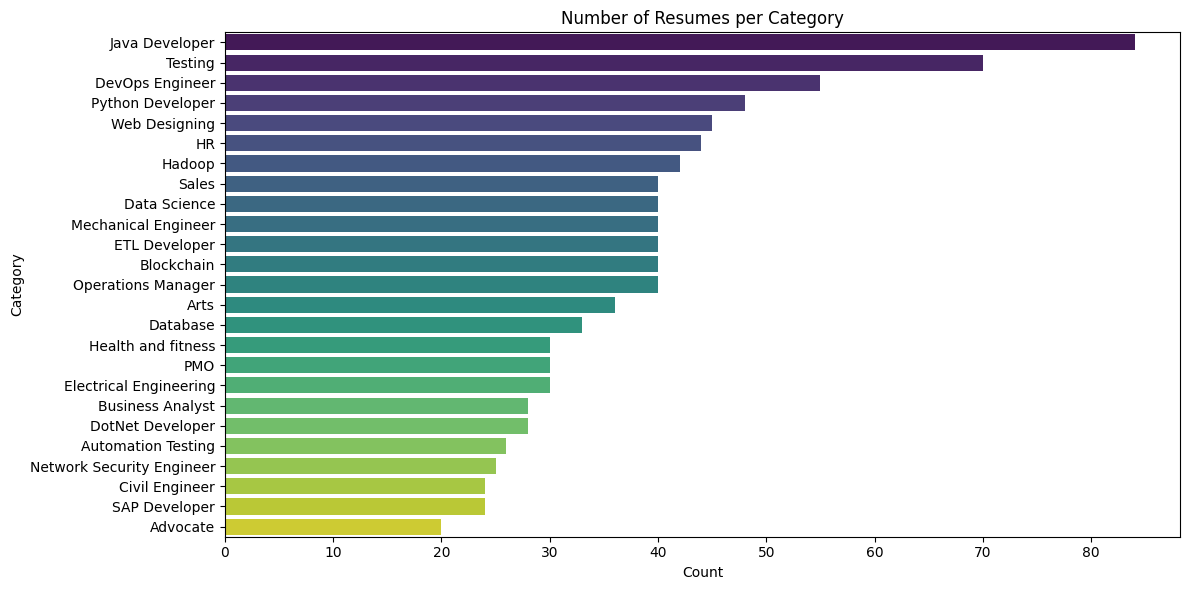

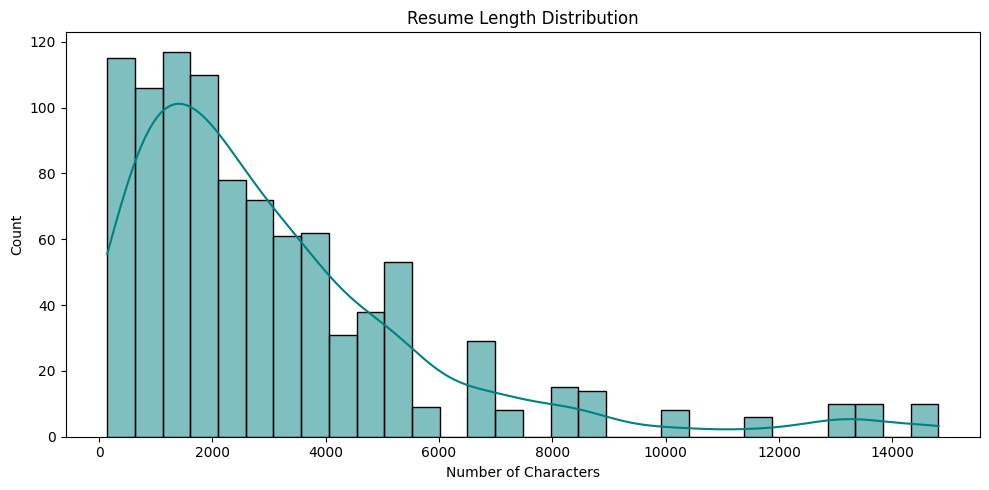

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("UpdatedResumeDataSet.csv")

# 1. Basic Information
print("Basic Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

# 2. Value Counts
print("\nCategory Distribution:")
print(df['Category'].value_counts())

# 3. Unique Categories
print("\nUnique Categories:", df['Category'].nunique())

# 4. Sample record
print("\nSample Resume:\n", df['Resume'][0][:500])  # print first 500 chars

# 5. Plot: Count of each Category
plt.figure(figsize=(12,6))
sns.countplot(y=df['Category'], order=df['Category'].value_counts().index, palette="viridis")
plt.title('Number of Resumes per Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

# 6. Resume Length Distribution
df['resume_len'] = df['Resume'].apply(len)
plt.figure(figsize=(10,5))
sns.histplot(df['resume_len'], bins=30, kde=True, color='teal')
plt.title('Resume Length Distribution')
plt.xlabel('Number of Characters')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [11]:
# Another sample resume (you can replace this text with any new resume content)
new_resume = """
Experienced software engineer skilled in Python, Django, and cloud platforms like AWS.
Developed scalable web applications and contributed to CI/CD pipelines.
"""

# Clean it
cleaned_new = cleanResume(new_resume)

# Convert to TF-IDF
new_features = tfidf.transform([cleaned_new])

# Predict category
predicted_new_category = nb_model.predict(new_features)[0]

print("Predicted Category:", predicted_new_category)
# Decode label to category name
category_name = le.inverse_transform([predicted_new_category])[0]
print("Predicted Job Category:", category_name)


Predicted Category: 8
Predicted Job Category: DevOps Engineer
